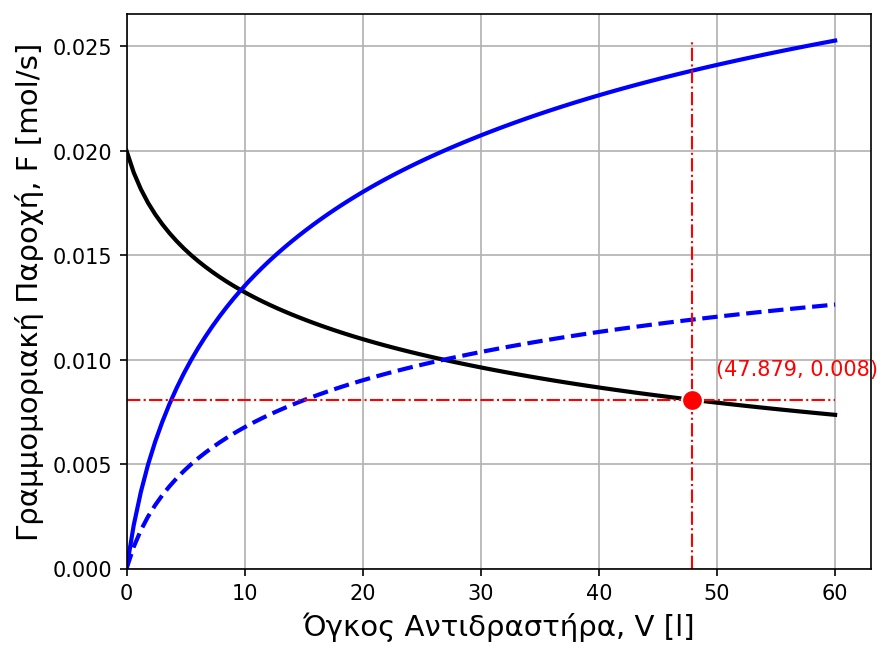

In [2]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def model(t,X):

    # Model Parameters
    k = 5;    # 2nd order reaction constant (l*mol^-1*s^-1)
    ## Wrong Solution
    # Qo = 1;   # Volumentric flowrate at the entrance (l*s^-1)
    ## Correct Solution
    Qo = (X[0]+X[1]+X[2])/0.02;

    # Algebraic Equations
    Ca = X[0]/Qo;

    dfdt = [
        -1 * k * Ca**2,   # x(1) [=] Fa (mol/s)
        2  * k * Ca**2,   # x(2) [=] Fb (mol/s)
        1  * k * Ca**2]   # x(3) [=] Fc (mol/s)

    return dfdt

# Time span for integration (0 to 60 seconds)
tspan = [0, 60]  # Initial and final time
t_eval = np.linspace(0, 60, 100)  # Time points at which to store the computed solution

# Initial Conditions
Init_Cond = [0.02, 0, 0];

# Solve the system of ODEs using solve_ivp with the RK45 method (default)
sol = solve_ivp(model, tspan, Init_Cond, t_eval=t_eval, method='RK45')

# Extract the solution at each time point
t = sol.t  # Time points
F = sol.y.T  # Solution array where F[:, 0] = FA, F[:, 1] = FB, F[:, 2] = FC

# Find the Reactor Volume for which FA = 0.008 mol/s
Rv_index = np.where(np.logical_and(F[:, 0] >= 0.0079, F[:, 0] <= 0.0081))[0][0]
Rf = F[Rv_index, 0]
Rv = t[Rv_index]

# Set up high-resolution plotting
plt.figure(dpi=150)

# Plot FA, FB, and FC
plt.plot(t, F[:, 0], label='$F_A$', c="black", lw=2)                     # Flow rate of A
plt.plot(t, F[:, 1], label='$F_B$', c="blue", lw=2)                      # Flow rate of B
plt.plot(t, F[:, 2], label='$F_C$', c="blue", lw=2, linestyle='dashed')  # Flow rate of C

# Mark and label intersection points
plt.scatter(Rv, Rf, color='red', s=100, edgecolor='white', zorder=5)
plt.text(Rv+2, Rf+0.001, f'({Rv:.3f}, {Rf:.3f})', color='red', fontsize=10, ha='left', va='bottom')

# Plot red dashed lines to mark Rv and Rf
plt.plot([Rv, Rv], [0, np.amax(F)], 'r-.', lw=1)  # Vertical line at Rv
plt.plot([0, np.amax(t)], [Rf, Rf], 'r-.', lw=1)  # Horizontal line at Rf

# Set labels and title
plt.grid(True)
plt.xlabel('Όγκος Αντιδραστήρα, V [l]', fontsize=14)
plt.ylabel('Γραμμομοριακή Παροχή, F [mol/s]', fontsize=14)
plt.xlim(left=0)  # X-axis starts at 0
plt.ylim(bottom=0)  # Y-axis starts at 275
#plt.title("Βαθμός Μετατροπής vs Θερμοκρασία")
plt.show()

# plt.savefig('fname')